In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CustomerDataProcessing").getOrCreate()

# Read and Process Data


In [0]:
df = spark.read.csv("/Volumes/workspace/default/cx/customers.csv", header=True, inferSchema=True)
df.show()


+-----------+-----------+---------+-----------+-------+-----------------+---------+
|customer_id|       name|     city|      state|country|registration_date|is_active|
+-----------+-----------+---------+-----------+-------+-----------------+---------+
|          0| Customer_0|     Pune|Maharashtra|  India|       2023-06-29|    false|
|          1| Customer_1|Bangalore| Tamil Nadu|  India|       2023-12-07|     true|
|          2| Customer_2|Hyderabad|    Gujarat|  India|       2023-10-27|     true|
|          3| Customer_3|Bangalore|  Karnataka|  India|       2023-10-17|    false|
|          4| Customer_4|Ahmedabad|  Karnataka|  India|       2023-03-14|    false|
|          5| Customer_5|Hyderabad|  Karnataka|  India|       2023-07-28|    false|
|          6| Customer_6|     Pune|      Delhi|  India|       2023-08-29|    false|
|          7| Customer_7|Ahmedabad|West Bengal|  India|       2023-12-28|     true|
|          8| Customer_8|     Pune|  Karnataka|  India|       2023-06-22|   

In [0]:
df.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- registration_date: date (nullable = true)
 |-- is_active: boolean (nullable = true)



In [0]:
from pyspark.sql.functions import *

Enforcing Schema

In [0]:
df = df.withColumn('registration_date',to_date(col('registration_date'),'yyyy-MM-dd'))


Checking for NaN values

In [0]:
print(f'We have {df.filter(col("customer_id").isNull()).count()} null from customer_id')
print(f'We have {df.filter(col("name").isNull()).count()} null from name')
print(f'We have {df.filter(col("city").isNull()).count()} null from city')
print(f'We have {df.filter(col("state").isNull()).count()} null from state')
print(f'We have {df.filter(col("country").isNull()).count()} null from country')
print(f'We have {df.filter(col("registration_date").isNull()).count()} null from registration_date')
print(f'We have {df.filter(col("is_active").isNull()).count()} null from is_active')

Adding Year and Month Column extracted from Registration Date column

In [0]:
df.withColumn('registration_year',year(col("registration_date"))).show()

+-----------+-----------+---------+-----------+-------+-----------------+---------+-----------------+
|customer_id|       name|     city|      state|country|registration_date|is_active|registration_year|
+-----------+-----------+---------+-----------+-------+-----------------+---------+-----------------+
|          0| Customer_0|     Pune|Maharashtra|  India|       2023-06-29|    false|             2023|
|          1| Customer_1|Bangalore| Tamil Nadu|  India|       2023-12-07|     true|             2023|
|          2| Customer_2|Hyderabad|    Gujarat|  India|       2023-10-27|     true|             2023|
|          3| Customer_3|Bangalore|  Karnataka|  India|       2023-10-17|    false|             2023|
|          4| Customer_4|Ahmedabad|  Karnataka|  India|       2023-03-14|    false|             2023|
|          5| Customer_5|Hyderabad|  Karnataka|  India|       2023-07-28|    false|             2023|
|          6| Customer_6|     Pune|      Delhi|  India|       2023-08-29|    false

In [0]:
df.withColumn('registration_month',month(col("registration_date"))).show()

+-----------+-----------+---------+-----------+-------+-----------------+---------+------------------+
|customer_id|       name|     city|      state|country|registration_date|is_active|registration_month|
+-----------+-----------+---------+-----------+-------+-----------------+---------+------------------+
|          0| Customer_0|     Pune|Maharashtra|  India|       2023-06-29|    false|                 6|
|          1| Customer_1|Bangalore| Tamil Nadu|  India|       2023-12-07|     true|                12|
|          2| Customer_2|Hyderabad|    Gujarat|  India|       2023-10-27|     true|                10|
|          3| Customer_3|Bangalore|  Karnataka|  India|       2023-10-17|    false|                10|
|          4| Customer_4|Ahmedabad|  Karnataka|  India|       2023-03-14|    false|                 3|
|          5| Customer_5|Hyderabad|  Karnataka|  India|       2023-07-28|    false|                 7|
|          6| Customer_6|     Pune|      Delhi|  India|       2023-08-29|

In [0]:
df.show()

+-----------+-----------+---------+-----------+-------+-----------------+---------+
|customer_id|       name|     city|      state|country|registration_date|is_active|
+-----------+-----------+---------+-----------+-------+-----------------+---------+
|          0| Customer_0|     Pune|Maharashtra|  India|       2023-06-29|    false|
|          1| Customer_1|Bangalore| Tamil Nadu|  India|       2023-12-07|     true|
|          2| Customer_2|Hyderabad|    Gujarat|  India|       2023-10-27|     true|
|          3| Customer_3|Bangalore|  Karnataka|  India|       2023-10-17|    false|
|          4| Customer_4|Ahmedabad|  Karnataka|  India|       2023-03-14|    false|
|          5| Customer_5|Hyderabad|  Karnataka|  India|       2023-07-28|    false|
|          6| Customer_6|     Pune|      Delhi|  India|       2023-08-29|    false|
|          7| Customer_7|Ahmedabad|West Bengal|  India|       2023-12-28|     true|
|          8| Customer_8|     Pune|  Karnataka|  India|       2023-06-22|   

Counting Unique Cities

In [0]:
df.selectExpr("count(distinct city)").show()

+--------------------+
|count(DISTINCT city)|
+--------------------+
|                   8|
+--------------------+



Showing unique Cities and associated country from the Dataset

In [0]:
df.select('city','country').distinct().show()

+---------+-------+
|     city|country|
+---------+-------+
|  Kolkata|  India|
|     Pune|  India|
|  Chennai|  India|
|Ahmedabad|  India|
|    Delhi|  India|
|Hyderabad|  India|
|Bangalore|  India|
|   Mumbai|  India|
+---------+-------+



Aggregation

In [0]:
city_counts = df.groupBy('city').count().orderBy(col('count'),descending=True)


In [0]:
pdf = city_counts.toPandas()

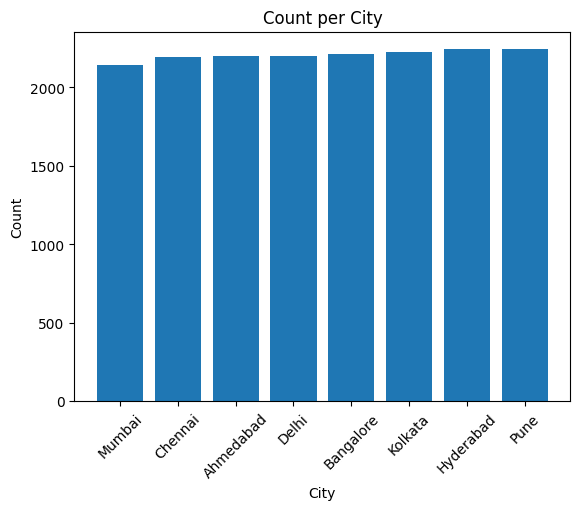

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(pdf['city'], pdf['count'])
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count per City')
plt.show()


Pivot Table

In [0]:
df.groupBy('state').pivot('is_active').count().show()

+-----------+-----+----+
|      state|false|true|
+-----------+-----+----+
|Maharashtra| 1260|1230|
|  Telangana| 1294|1226|
|  Karnataka| 1207|1276|
|    Gujarat| 1211|1332|
| Tamil Nadu| 1284|1252|
|      Delhi| 1356|1222|
|West Bengal| 1306|1197|
+-----------+-----+----+



In [0]:
display(df)


customer_id name city state country registration_date is_active 0 Customer_0 Pune Maharashtra India 2023-06-29 false 1 Customer_1 Bangalore Tamil Nadu India 2023-12-07 true 2 Customer_2 Hyderabad Gujarat India 2023-10-27 true 3 Customer_3 Bangalore Karnataka India 2023-10-17 false 4 Customer_4 Ahmedabad Karnataka India 2023-03-14 false 5 Customer_5 Hyderabad Karnataka India 2023-07-28 false 6 Customer_6 Pune Delhi India 2023-08-29 false 7 Customer_7 Ahmedabad West Bengal India 2023-12-28 true 8 Customer_8 Pune Karnataka India 2023-06-22 true 9 Customer_9 Mumbai Telangana India 2023-01-05 true 10 Customer_10 Pune Gujarat India 2023-08-05 true 11 Customer_11 Delhi West Bengal India 2023-08-02 false 12 Customer_12 Chennai Gujarat India 2023-11-21 false 13 Customer_13 Chennai Karnataka India 2023-11-06 true 14 Customer_14 Hyderabad Tamil Nadu India 2023-02-07 false 15 Customer_15 Mumbai Gujarat India 2023-03-02 true 16 Customer_16 Chennai Karnataka India 2023-04-05 false 17 Customer_17 Hyderabad West Bengal India 2023-08-21 false 18 Customer_18 Pune Delhi India 2023-10-04 true 19 Customer_19 Kolkata Gujarat India 2023-02-05 true 20 Customer_20 Hyderabad Telangana India 2023-01-01 true 21 Customer_21 Bangalore Tamil Nadu India 2023-05-30 true 22 Customer_22 Chennai West Bengal India 2023-08-03 true 23 Customer_23 Chennai Maharashtra India 2023-02-15 false 24 Customer_24 Kolkata Karnataka India 2023-03-06 false 25 Customer_25 Pune Tamil Nadu India 2023-01-06 false 26 Customer_26 Delhi Delhi India 2023-03-22 true 27 Customer_27 Ahmedabad Gujarat India 2023-07-08 true 28 Customer_28 Hyderabad Maharashtra India 2023-05-31 true 29 Customer_29 Delhi Gujarat India 2023-05-28 false 30 Customer_30 Hyderabad Karnataka India 2023-01-28 false 31 Customer_31 Kolkata Tamil Nadu India 2023-06-14 false 32 Customer_32 Delhi Telangana India 2023-05-15 false 33 Customer_33 Mumbai West Bengal India 2023-09-11 false 34 Customer_34 Kolkata Gujarat India 2023-11-01 true 35 Customer_35 Pune Karnataka India 2023-07-31 false 36 Customer_36 Ahmedabad Tamil Nadu India 2023-10-07 true 37 Customer_37 Hyderabad Karnataka India 2023-03-21 true 38 Customer_38 Bangalore Telangana India 2023-09-26 false 39 Customer_39 Pune Tamil Nadu India 2023-12-14 false 40 Customer_40 Pune West Bengal India 2023-01-15 false 41 Customer_41 Bangalore Karnataka India 2023-03-28 false 42 Customer_42 Bangalore Gujarat India 2023-08-11 true 43 Customer_43 Hyderabad Tamil Nadu India 2023-11-21 true 44 Customer_44 Pune Gujarat India 2023-04-01 true 45 Customer_45 Chennai Maharashtra India 2023-11-12 false 46 Customer_46 Kolkata Delhi India 2023-09-23 true 47 Customer_47 Kolkata Telangana India 2023-11-03 true 48 Customer_48 Ahmedabad Tamil Nadu India 2023-11-16 true 49 Customer_49 Delhi Gujarat India 2023-04-16 true 50 Customer_50 Kolkata Tamil Nadu India 2023-09-10 true 51 Customer_51 Ahmedabad Tamil Nadu India 2023-07-18 true 52 Customer_52 Ahmedabad Karnataka India 2023-02-25 true 53 Customer_53 Pune Telangana India 2023-08-27 true 54 Customer_54 Kolkata Delhi India 2023-12-13 false 55 Customer_55 Pune Telangana India 2023-12-07 true 56 Customer_56 Delhi Karnataka India 2023-12-29 false 57 Customer_57 Kolkata Gujarat India 2023-08-06 false 58 Customer_58 Kolkata Tamil Nadu India 2023-07-31 true 59 Customer_59 Ahmedabad Telangana India 2023-07-08 true 60 Customer_60 Mumbai Tamil Nadu India 2023-12-01 true 61 Customer_61 Hyderabad Delhi India 2023-12-31 false 62 Customer_62 Delhi Maharashtra India 2023-04-12 true 63 Customer_63 Mumbai Karnataka India 2023-05-23 true 64 Customer_64 Chennai Maharashtra India 2023-10-12 false 65 Customer_65 Delhi Telangana India 2023-03-11 true 66 Customer_66 Pune Tamil Nadu India 2023-12-02 true 67 Customer_67 Hyderabad Gujarat India 2023-03-06 false 68 Customer_68 Kolkata Gujarat India 2023-07-17 false 69 Customer_69 Pune Tamil Nadu India 2023-01-16 true 70 Customer_70 Kolkata West Bengal India 2023-11-06 true 71 Customer_71 Mumbai West Bengal India 2023

In [0]:
from pyspark.sql.window import Window


In [0]:
window_spec = Window.partitionBy('state').orderBy(col('registration_date').desc())


In [0]:
df = df.withColumn('rank', rank().over(window_spec))\
       .withColumn('dense_rank', dense_rank().over(window_spec))\
       .withColumn('row_number', row_number().over(window_spec))\
       .withColumn('percent_rank', percent_rank().over(window_spec))

In [0]:
df.select('city','country','dense_rank','row_number','percent_rank').show()

+---------+-------+----------+----------+--------------------+
|     city|country|dense_rank|row_number|        percent_rank|
+---------+-------+----------+----------+--------------------+
|Hyderabad|  India|         1|         1|                 0.0|
|   Mumbai|  India|         1|         2|                 0.0|
|     Pune|  India|         1|         3|                 0.0|
|Ahmedabad|  India|         1|         4|                 0.0|
|Bangalore|  India|         1|         5|                 0.0|
|  Chennai|  India|         1|         6|                 0.0|
|Ahmedabad|  India|         1|         7|                 0.0|
|  Chennai|  India|         1|         8|                 0.0|
|  Chennai|  India|         1|         9|                 0.0|
|     Pune|  India|         2|        10|0.003492433061699...|
|Hyderabad|  India|         2|        11|0.003492433061699...|
|     Pune|  India|         2|        12|0.003492433061699...|
|  Kolkata|  India|         2|        13|0.003492433061

Getting Recent Customers

In [0]:
df_recentcx = df.filter(col('registration_date') >= '2023-07-01' )

In [0]:
df_recentcx.show()

+-----------+--------------+---------+-----+-------+-----------------+---------+----+----------+----------+--------------------+
|customer_id|          name|     city|state|country|registration_date|is_active|rank|dense_rank|row_number|        percent_rank|
+-----------+--------------+---------+-----+-------+-----------------+---------+----+----------+----------+--------------------+
|         61|   Customer_61|Hyderabad|Delhi|  India|       2023-12-31|    false|   1|         1|         1|                 0.0|
|        501|  Customer_501|   Mumbai|Delhi|  India|       2023-12-31|    false|   1|         1|         2|                 0.0|
|       2763| Customer_2763|     Pune|Delhi|  India|       2023-12-31|     true|   1|         1|         3|                 0.0|
|      12858|Customer_12858|Ahmedabad|Delhi|  India|       2023-12-31|     true|   1|         1|         4|                 0.0|
|      13570|Customer_13570|Bangalore|Delhi|  India|       2023-12-31|    false|   1|         1| 

In [0]:
print(f'We have {df_recentcx.count()} recent customers')

We have 9025 recent customers


Oldest and New Customer - Grouping

In [0]:
df.groupBy('city').agg(min('registration_date').alias('oldest'), max('registration_date').alias('newest')).show()

+---------+----------+----------+
|     city|    oldest|    newest|
+---------+----------+----------+
|  Kolkata|2023-01-01|2023-12-31|
|Bangalore|2023-01-01|2023-12-31|
|  Chennai|2023-01-01|2023-12-31|
|    Delhi|2023-01-01|2023-12-31|
|Ahmedabad|2023-01-01|2023-12-31|
|   Mumbai|2023-01-01|2023-12-31|
|     Pune|2023-01-01|2023-12-31|
|Hyderabad|2023-01-01|2023-12-31|
+---------+----------+----------+



In [0]:
output_path = '/Volumes/workspace/default/ian'

In [0]:
df2 = spark.read.parquet(output_path)


In [0]:
df2.show()

+-----------+--------------+---------+-----+-------+-----------------+---------+----+----------+----------+--------------------+
|customer_id|          name|     city|state|country|registration_date|is_active|rank|dense_rank|row_number|        percent_rank|
+-----------+--------------+---------+-----+-------+-----------------+---------+----+----------+----------+--------------------+
|         61|   Customer_61|Hyderabad|Delhi|  India|       2023-12-31|    false|   1|         1|         1|                 0.0|
|        501|  Customer_501|   Mumbai|Delhi|  India|       2023-12-31|    false|   1|         1|         2|                 0.0|
|       2763| Customer_2763|     Pune|Delhi|  India|       2023-12-31|     true|   1|         1|         3|                 0.0|
|      12858|Customer_12858|Ahmedabad|Delhi|  India|       2023-12-31|     true|   1|         1|         4|                 0.0|
|      13570|Customer_13570|Bangalore|Delhi|  India|       2023-12-31|    false|   1|         1| 

# Joining Dataset and Analyzing Customer

In [0]:
order_df = spark.read.format('csv').option('header', True).option('inferSchema', True).load('/Volumes/workspace/default/orders/orders.csv')

In [0]:
order_df.show()

+--------+-----------+----------+------------------+---------+
|order_id|customer_id|order_date|      total_amount|   status|
+--------+-----------+----------+------------------+---------+
|       0|       3692|2024-09-03| 547.7160076008001|  Shipped|
|       1|      11055|2024-08-10| 577.8942599188381|  Pending|
|       2|       6963|2024-08-22| 484.2085562764487|  Pending|
|       3|      13268|2024-09-01| 366.3286882431848|Cancelled|
|       4|       1131|2024-08-09| 896.9588380686909|  Pending|
|       5|      15211|2024-05-03|486.30584827618145|  Shipped|
|       6|       3209|2024-08-24| 800.9795667933956|  Shipped|
|       7|      15964|2024-11-24| 641.3521833737843|Cancelled|
|       8|       9697|2024-06-18| 789.1864475667901|Delivered|
|       9|       8917|2024-09-01| 878.8901928499223|  Shipped|
|      10|         68|2024-02-01|250.90701173471632|  Pending|
|      11|       2826|2024-10-22| 830.3870224465686|  Pending|
|      12|        436|2024-03-16| 723.8916744984356|  P

# Analysis

In [0]:
joined_df = df2.join(order_df, on="customer_id", how="inner")


In [0]:
joined_df.select('customer_id','city','registration_date','order_date').show()

+-----------+---------+-----------------+----------+
|customer_id|     city|registration_date|order_date|
+-----------+---------+-----------------+----------+
|       3692|  Kolkata|       2023-02-05|2024-09-03|
|      11055|    Delhi|       2023-03-18|2024-08-10|
|       6963|Bangalore|       2023-03-26|2024-08-22|
|      13268|Ahmedabad|       2023-03-02|2024-09-01|
|       1131|     Pune|       2023-04-10|2024-08-09|
|      15211|Hyderabad|       2023-05-01|2024-05-03|
|       3209|    Delhi|       2023-08-30|2024-08-24|
|      15964|Bangalore|       2023-10-27|2024-11-24|
|       9697|   Mumbai|       2023-01-18|2024-06-18|
|       8917|Ahmedabad|       2023-02-18|2024-09-01|
|         68|  Kolkata|       2023-07-17|2024-02-01|
|       2826|Bangalore|       2023-06-19|2024-10-22|
|        436|    Delhi|       2023-06-05|2024-03-16|
|      17191|  Chennai|       2023-01-05|2024-07-22|
|      16938|  Chennai|       2023-04-13|2024-03-31|
|      13254|  Kolkata|       2023-08-25|2024-

In [0]:
joined_df.count()

17653

In [0]:
joined_df.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- registration_date: date (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- rank: integer (nullable = true)
 |-- dense_rank: integer (nullable = true)
 |-- row_number: integer (nullable = true)
 |-- percent_rank: double (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- order_date: date (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- status: string (nullable = true)



In [0]:
display(joined_df)

customer_id name city state country registration_date is_active rank dense_rank row_number percent_rank order_id order_date total_amount status 3692 Customer_3692 Kolkata Gujarat India 2023-02-05 false 2281 330 2282 0.8969315499606609 0 2024-09-03 547.7160076008001 Shipped 11055 Customer_11055 Delhi Delhi India 2023-03-18 false 2050 289 2057 0.7951105937136205 1 2024-08-10 577.8942599188381 Pending 6963 Customer_6963 Bangalore Telangana India 2023-03-26 true 1977 281 1978 0.7844382691544264 2 2024-08-22 484.2085562764487 Pending 13268 Customer_13268 Ahmedabad West Bengal India 2023-03-02 false 2121 305 2124 0.8473221422861711 3 2024-09-01 366.3286882431848 Cancelled 1131 Customer_1131 Pune Telangana India 2023-04-10 false 1867 266 1867 0.740770146883684 4 2024-08-09 896.9588380686909 Pending 15211 Customer_15211 Hyderabad Maharashtra India 2023-05-01 false 1649 244 1654 0.6621132985134592 5 2024-05-03 486.30584827618145 Shipped 3209 Customer_3209 Delhi Telangana India 2023-08-30 false 874 124 876 0.3465660976578007 6 2024-08-24 800.9795667933956 Shipped 15964 Customer_15964 Bangalore Maharashtra India 2023-10-27 false 449 66 453 0.1799919646444355 7 2024-11-24 641.3521833737843 Cancelled 9697 Customer_9697 Mumbai Karnataka India 2023-01-18 true 2363 348 2370 0.951651893634166 8 2024-06-18 789.1864475667901 Delivered 8917 Customer_8917 Ahmedabad West Bengal India 2023-02-18 false 2199 317 2200 0.8784972022382095 9 2024-09-01 878.8901928499223 Shipped 68 Customer_68 Kolkata Gujarat India 2023-07-17 false 1171 168 1171 0.46026750590086546 10 2024-02-01 250.90701173471632 Pending 2826 Customer_2826 Bangalore Telangana India 2023-06-19 false 1374 196 1378 0.5450575625248114 11 2024-10-22 830.3870224465686 Pending 436 Customer_436 Delhi Delhi India 2023-06-05 false 1494 210 1494 0.5793558401241754 12 2024-03-16 723.8916744984356 Pending 17191 Customer_17191 Chennai Gujarat India 2023-01-05 true 2502 361 2513 0.9838709677419355 13 2024-07-22 565.4621691131047 Cancelled 16938 Customer_16938 Chennai Telangana India 2023-04-13 true 1850 263 1855 0.7340214370782057 14 2024-03-31 549.5139113791525 Pending 13254 Customer_13254 Kolkata Gujarat India 2023-08-25 true 874 129 878 0.34343036978756886 15 2024-10-28 318.3055446959585 Delivered 8107 Customer_8107 Pune West Bengal India 2023-05-23 false 1538 223 1542 0.614308553157474 16 2024-01-26 545.2292782609134 Cancelled 14662 Customer_14662 Hyderabad Karnataka India 2023-04-18 true 1776 258 1780 0.7151490733279613 17 2024-04-16 390.50606498059494 Cancelled 17007 Customer_17007 Kolkata Karnataka India 2023-06-11 false 1417 204 1424 0.5705076551168412 18 2024-09-26 889.9218191968122 Delivered 15730 Customer_15730 Mumbai Gujarat India 2023-12-05 true 210 27 213 0.08221872541306058 19 2024-07-24 586.2554183766008 Pending 13743 Customer_13743 Bangalore Telangana India 2023-08-11 true 1021 143 1027 0.40492258832870187 20 2024-04-07 306.03955079810424 Cancelled 6990 Customer_6990 Ahmedabad Karnataka India 2023-04-13 true 1803 263 1807 0.726027397260274 21 2024-06-30 152.93058831932356 Cancelled 7741 Customer_7741 Delhi Karnataka India 2023-02-10 false 2215 325 2220 0.8920225624496374 22 2024-01-08 697.0451679710573 Pending 3516 Customer_3516 Kolkata Karnataka India 2023-10-15 true 523 78 525 0.21031426269137793 23 2024-06-15 668.0685604928779 Shipped 4908 Customer_4908 Hyderabad Delhi India 2023-05-28 false 1556 218 1560 0.6034148234381064 24 2024-01-15 366.45306613613286 Shipped 11465 Customer_11465 Kolkata Karnataka India 2023-07-01 true 1287 184 1292 0.5181305398871877 25 2024-09-16 170.55118992718954 Cancelled 2909 Customer_2909 Ahmedabad Delhi India 2023-07-19 true 1191 166 1191 0.46177726038028716 26 2024-07-11 719.0175352737818 Pending 10286 Customer_10286 Mumbai Telangana India 2023-10-29 true 455 64 463 0.18023025009924573 27 2024-06-11 277.69074418564924 Shipped 11518 Customer_11518 Ahmedabad Karnataka India 2023-09-25 false 675 98 678 0.2715551974214343 28 2024-01-06 863.3904152155532 Can

Total Order Per Customer
Extracting the customer with highest order

In [0]:
order_df.groupBy('customer_id').count().orderBy(col('count').desc()).show()

+-----------+-----+
|customer_id|count|
+-----------+-----+
|      11776|    7|
|       3243|    6|
|      13034|    6|
|       4294|    6|
|      14838|    6|
|       5160|    6|
|       7566|    6|
|       3336|    6|
|       3884|    6|
|      12725|    5|
|      13940|    5|
|       1577|    5|
|      16020|    5|
|      11823|    5|
|      16030|    5|
|       2428|    5|
|      16747|    5|
|      11877|    5|
|        957|    5|
|      10559|    5|
+-----------+-----+
only showing top 20 rows


Total Spend per Customer

In [0]:
total_spend_df = joined_df.groupBy('customer_id').agg(sum('total_amount').alias('total_spend')).orderBy(col('total_spend').desc())
total_spend_df.show()

+-----------+------------------+
|customer_id|       total_spend|
+-----------+------------------+
|       3336| 4362.550733141537|
|       3884|  4187.99763145619|
|      16020|3967.2692112582276|
|      14372| 3961.787139557334|
|      14933|3828.5841072418348|
|       7566| 3647.119115720654|
|      10559|3548.8378633460234|
|      11776|  3438.36692751212|
|      11449| 3396.060974816134|
|       5425| 3389.162933156913|
|      15014| 3365.078728621099|
|      13940|3354.7104846187476|
|       9282| 3335.140545881391|
|       9073|3327.7198997109954|
|       9415| 3314.702664499254|
|      17069| 3248.721429958719|
|       6588|3231.5186848832673|
|      10997|  3208.89243531518|
|       1636| 3195.551527032096|
|      13034|3195.0224622202268|
+-----------+------------------+
only showing top 20 rows


In [0]:
from pyspark.sql import functions as F

avg_df = joined_df.groupBy('customer_id') \
                  .agg(F.avg('total_amount').alias('avg_spend')) \
                  .orderBy(F.col('avg_spend').desc())

avg_df.show()

+-----------+-----------------+
|customer_id|        avg_spend|
+-----------+-----------------+
|      11854| 999.864258397557|
|         46| 999.592553819927|
|      17590|999.5726342625253|
|      11587|999.5595016039513|
|       6816|999.4348902885968|
|       9648| 999.421469440536|
|      15486|999.0348855189945|
|      10980|998.9071094160754|
|       1711|998.7736900580057|
|       6333|998.6394502434505|
|      11417|998.6286374482988|
|      13629|998.5640177477633|
|      14428|998.4011290443368|
|       9327|998.3932353995232|
|      10839|998.2803475636405|
|      10406|998.1377806561431|
|       9952| 998.029851157374|
|       6100|997.8532202101544|
|      11671|997.7294075904122|
|       7652|997.4915505356507|
+-----------+-----------------+
only showing top 20 rows


Status

In [0]:
Status = joined_df.groupBy('status').count().show()

+---------+-----+
|   status|count|
+---------+-----+
|Delivered| 4341|
|Cancelled| 4469|
|  Shipped| 4386|
|  Pending| 4457|
+---------+-----+



Number Of Orders by Month

In [0]:
monthly_orders = joined_df.withColumn('month', month('order_date')).groupBy('month').count().orderBy(col('month').asc()).show()

+-----+-----+
|month|count|
+-----+-----+
|    1| 1499|
|    2| 1368|
|    3| 1539|
|    4| 1457|
|    5| 1518|
|    6| 1455|
|    7| 1517|
|    8| 1472|
|    9| 1446|
|   10| 1513|
|   11| 1426|
|   12| 1443|
+-----+-----+



Finding Customer with high order Frequency but Low Total Spend

In [0]:
joined_df.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- registration_date: date (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- rank: integer (nullable = true)
 |-- dense_rank: integer (nullable = true)
 |-- row_number: integer (nullable = true)
 |-- percent_rank: double (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- order_date: date (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- status: string (nullable = true)



In [0]:

high_order_customer = joined_df.groupBy('customer_id') \
    .agg(
        count("*").alias("order_count"),
        sum("total_amount").alias("total_spend")
    ) \
    .orderBy(F.col("order_count").desc())

high_order_customer.show()

+-----------+-----------+------------------+
|customer_id|order_count|       total_spend|
+-----------+-----------+------------------+
|      11776|          7|  3438.36692751212|
|       3243|          6|2860.1827303387754|
|      13034|          6|3195.0224622202268|
|       4294|          6| 1821.603928366352|
|      14838|          6| 2894.355602564058|
|       5160|          6| 1656.737343311546|
|       7566|          6| 3647.119115720654|
|       3336|          6| 4362.550733141537|
|       3884|          6|  4187.99763145619|
|      12725|          5|2129.3894068066566|
|      13940|          5|3354.7104846187476|
|       1577|          5| 2257.375047135974|
|      16020|          5|3967.2692112582276|
|      11823|          5|2453.2752206801156|
|      16030|          5|2404.7890924200387|
|       2428|          5| 2332.407093249715|
|      16747|          5|2644.7811587208525|
|      11877|          5|3086.6531127853095|
|        957|          5|3057.2465355078048|
|      105

In [0]:
order_cx_output = '/Volumes/workspace/default/cx/customer-orders/'
joined_df.write.mode('overwrite').parquet(order_cx_output)